Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 
Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time seriesof login counts in ways that best characterize the underlying patterns of the demand. 
Please report/illustrate important features of the demand, such as daily cycles. 
If there are data quality issues, please report them.

In [50]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [51]:
#df_logins = pd.read_json("logins.json")
df_logins = pd.read_json("logins.json")
df_logins["count"] = 1
df_logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [52]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
count         93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [53]:
df_logins.describe()

,count
count,93142.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [54]:
#Aggregate these login counts based on 15 minute time intervals
df_logins_count = df_logins.groupby(pd.Grouper(key='login_time', freq='900s')).count()
df_logins_count['day_of_week'] = (pd.DatetimeIndex(df_logins_count.index).dayofweek)
df_logins_count['hour'] = (pd.DatetimeIndex(df_logins_count.index).hour)
df_logins_count.head()

,count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,2,3,20
1970-01-01 20:15:00,6,3,20
1970-01-01 20:30:00,9,3,20
1970-01-01 20:45:00,7,3,20
1970-01-01 21:00:00,1,3,21


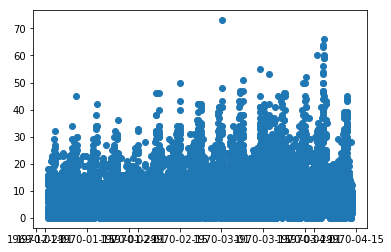

In [55]:
from matplotlib.dates import date2num
plt.plot_date(date2num(list(df_logins_count.index)), df_logins_count["count"].values)

In [56]:

df_logins = df_logins.groupby(pd.Grouper(key='login_time', freq='900s')).count()
df_logins['day_of_week'] = (pd.DatetimeIndex(df_logins.index).dayofweek)
df_logins['hour'] = (pd.DatetimeIndex(df_logins.index).hour)
df_logins.head()
#dt.day_name()
#df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.weekday_name

,count,day_of_week,hour
login_time,,,
1970-01-01 20:00:00,2,3,20
1970-01-01 20:15:00,6,3,20
1970-01-01 20:30:00,9,3,20
1970-01-01 20:45:00,7,3,20
1970-01-01 21:00:00,1,3,21


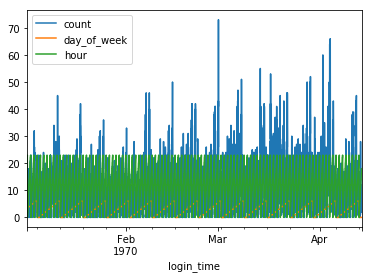

In [57]:
df_logins.resample('15T').sum().plot()
plt.show()

In [58]:
df_logins_count["day_of_week"][df_logins_count["count"] > 30].value_counts()

5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: day_of_week, dtype: int64

In [59]:
df_logins_count["day_of_week"][df_logins_count["count"] > 20].value_counts()

5    310
6    258
4    169
3     92
2     64
1     56
0     30
Name: day_of_week, dtype: int64

Weekends are high

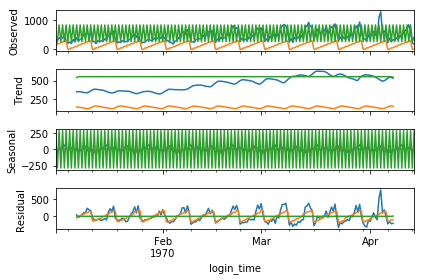

In [60]:

decomposition = sm.tsa.seasonal_decompose(df_logins.resample('12H').sum())
decomposition.plot()
plt.show()

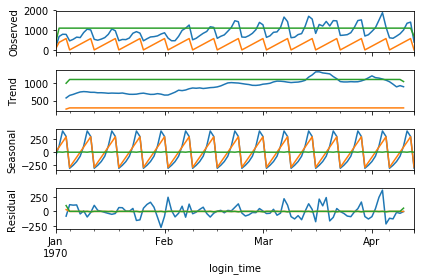

In [61]:
decomposition = sm.tsa.seasonal_decompose(df_logins.resample('24H').sum())
decomposition.plot()
plt.show()

# Predictive modeling

In [62]:
with open("ultimate_data_challenge.json") as f:
    df_ult = json.load(f)

Ult_data = pd.DataFrame(df_ult)
Ult_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [63]:
Ult_data.shape

(50000, 12)

In [64]:
Ult_data.info

<bound method DataFrame.info of        avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0          3.67                   5.0                   4.7       1.10   
1          8.26                   5.0                   5.0       1.00   
2          0.77                   5.0                   4.3       1.00   
3          2.36                   4.9                   4.6       1.14   
4          3.13                   4.9                   4.4       1.19   
5         10.56                   5.0                   3.5       1.00   
6          3.95                   4.0                   NaN       1.00   
7          2.04                   5.0                   5.0       1.00   
8          4.36                   5.0                   4.5       1.00   
9          2.37                   5.0                   NaN       1.00   
10         4.28                   4.9                   5.0       1.00   
11         3.81                   5.0                   4.0       1.00   
12    

In [65]:
# Missing values

missing_val_count_by_column = (Ult_data.isnull().sum())
print(missing_val_count_by_column)



avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [66]:
#Removing missing values 
Ult_data.dropna(inplace = True)

In [67]:
missing_val_count_by_column = (Ult_data.isnull().sum())
print(missing_val_count_by_column)

print('shape of dataframe {}'.format(Ult_data.shape))

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64
shape of dataframe (41445, 12)


In [68]:
# Active users

Ult_data['active_Users'] = (pd.to_datetime(Ult_data["last_trip_date"]) < pd.to_datetime(max(Ult_data["last_trip_date"])) - pd.Timedelta("30 days")) + 0
Ult_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_Users
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [69]:
#tt = pd.to_datetime(Ult_data["last_trip_date"]

In [70]:
active_Users = (pd.to_datetime(Ult_data["last_trip_date"]) < pd.to_datetime(max(Ult_data["last_trip_date"])) - pd.Timedelta("30 days")) + 0
active_Users.value_counts()

1    24410
0    17035
Name: last_trip_date, dtype: int64

In [71]:
#Retained user percentage

actpercent = active_Users.value_counts()[0]/len(active_Users)  * 100
print('Retained user percentage {}'.format(round(actpercent)))

Retained user percentage 41.0


In [72]:
df_dummies = pd.get_dummies(Ult_data)
#df_dummies.head()
y = df_dummies['active_Users'].values
X = df_dummies.drop(columns = ['active_Users'])

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import svm

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [75]:

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test) 

mse = mean_squared_error(y_test,y_pred)
print("MSE: %.4f" % mse)

MSE: 0.0848


Text(0, 0.5, 'Deviance')

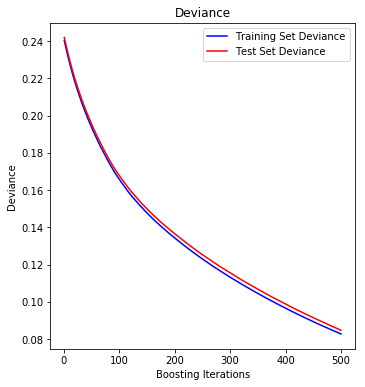

In [76]:

test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [77]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Algorithm :",  clf)
print ("\n Classification report : \n",classification_report(y_test,y_pred))
print ("Accuracy   Score : ",accuracy_score(y_test,y_pred))
model_roc_auc = roc_auc_score(y_test,y_pred) 
print ("Area under curve : ",model_roc_auc,"\n")
#fpr,tpr,thresholds = roc_curve(y_test,Proba[:,1])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Algorithm : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      4333
           1       0.98      0.96      0.97      6029

   micro avg       0.97      0.97      0.97     10362
   macro avg       0.96      0.97      0.97     10362
weighted avg       0.97      0.97      0.97     10362

Accuracy   Score :  0.9660297239915074
Area under curve :  0.9674318186002825 

Accuracy: 0.9660297239915074
